## Lighthouse Labs
### W04D04 Optimization
Instructor: Socorro Dominguez

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

**AGENDA:**
- Issues and Challenges in ML (20 min)
    - Bias in ML
- Optimization (55 min)
    - Gradient Descent
    - Stochastic Gradient Descent
- 5 min break (Time Permitting 5 min)
- Regularization (40 min)
    - L1 Regularization
    - L2 Regularization

### Issues and Challenges in AI

What do you think are the most Common Issues that AI poses?

We have all seen what ML can do to improve our lives. Even now, we trust algorithms and data more than our logic and judgement.

However, many times, we fail to see what the limitations are. 

Remember the last time your GPS asked you to fly?

1. Ethics

> We have given lots of data blindly. People use LinkedIn or Dating Sites and answer from the most innocent to the most awkward questions. 
>
> Most of the people don't realize that once they've answered the questions, their data becomes public. 
>
> Optional Readings/Videos:
>
> [The OK Cupid Case](https://www.forbes.com/sites/emmawoollacott/2016/05/13/intimate-data-of-70000-okcupid-users-released/#af9d9301e15d)  
> [Show Me Your Data and I'll Tell You Who You Are" by Sandra Wachter](https://www.youtube.com/watch?v=YYb1Dtc1B40)

2. Deterministic Problems

> ML is incredibly powerful for sensors and can be used to help calibrate sensors measuring environmental variables (temperature, pressure, and humidity). 
>
> There are currently deterministic models that work fine in order to predict tomorrow's weather. Using an ML model could be possible too. However, the computational cost would be too expensive since ML is stochastic, not deterministic.
>
> Furthermore ML does not understand physical constraints.

3. Data

> Lack of Data or Bad Data can bias against a group of people.
>
> Examples include mamography tests - when females of black heritage were not represented on the dataset making predictions regarding breast cancer not accurate for them.
>
> When transgender individuals are not represented in voice software, being outed by applications.
>
> Optional Readings:  
> [Dynamic
Sound
Identification - Princeton Case Study](https://aiethics.princeton.edu/wp-content/uploads/sites/587/2018/10/Princeton-AI-Ethics-Case-Study-2.pdf)  
[Amazon scraps secret AI recruiting tool that showed bias against women](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G)

4. Interpretability

> One of the primary problems with ML. An AI consultancy firm trying to pitch to a firm that only uses traditional statistical methods can be stopped dead if they do not see the model as interpretable. 
Sometimes, a recommendations system can't be explained in business terms.



### Optimization

What is an Optimization Algorithm?

*Review of Loss and Loss Function*
* In the context of an optimization algorithm, the function used to evaluate a candidate solution (a set of weights) is referred to as the objective function.

* The objective function is also called: cost function or loss function.  
* The value calculated by the loss function is referred to as “loss”.

* We may seek to maximize or minimize the objective function, meaning that we are searching for a candidate solution that has the highest or lowest score respectively.
    * By convention, MOST optimization algorithms are concerned with minimization. 
    * If we ever need to maximize an objective there is a simple solution: just flip the sign on the objective.



**A way to think a ML process:**  
We can start to think of (a lot of) ML as a 3-step process:

* Choose your model
* Choose your loss function
* Choose your optimization algorithm

* The model controls the space of possible functions from $X$ to $y$.
    * e.g., a linear model can only learn linear functions.

* The loss function tells us how to compare these various functions.
    * e.g. , is $y=2x_1+3x_2$ a better model than $y=10x_1-x_2$?

* The optimization algorithm finds the minimum of the loss function.

#### Gradient Descent

GD is an iterative optimization algorithm that we use to find the minimum of a function.

To find a local minimum of a function, we start at a random point and take steps to the negative of the gradient of the function at the current point.

GD helps us find optimal parameters for linear models and neural networks. For many models, such as logistic regression, the optimization criterion is convex. Convex functions have only one minimum, which is global. Neural networks are not convex, but finding a local minimum usually suffices.

Notice that GD and its variants are not machine learning algorithms. They are solvers of minimization problems in which the function to minimize has a gradient

*Ingredients for GD*

**Ingredient 1: functions of multiple variables**
    * We can write such a function as $f(x,y,z)$ (for 3 inputs) or $f(x)$ if $x$ is a vector.
    * Example: $f(x,y,z) = x^2 + y^2 + e^z + x^z + xyz$.

In [10]:
def f(x, y, z):
    return x**2 + y**2 + np.exp(z) + np.power(x,z) + x*y*z

f(1,2,3)

32.08553692318767

**Ingredient 2: vector-valued functions**

* Functions with multiple outputs (and may or may not have multiple inputs).
    * Example with 1 input and 3 outputs:$$f(x)=\begin{bmatrix} x^2 \\ 2x \\ -x\end{bmatrix}$$
    * Example with 3 inputs and 4 outputs:$$f(x,y,z)=\begin{bmatrix} yz^2 \\ 0 \\ xyz \\ x-y\end{bmatrix}$$

In [11]:
def f(x,y):
    return np.array([x, np.sin(y)]) 

f(2,10)

array([ 2.        , -0.54402111])

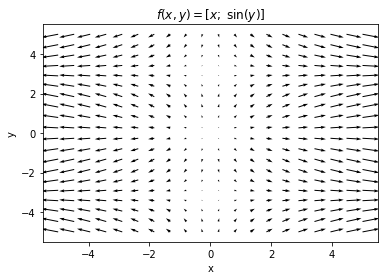

In [12]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
xx, yy = np.meshgrid(x,y)
zz = f(xx,yy)

plt.quiver(xx,yy,zz[0],zz[1]);
# plt.axis('square');
plt.xlabel('x');
plt.ylabel('y');
plt.title('$f(x,y) = [x; \; \sin(y)]$')
plt.show()

*Notes:*

For a fixed $y$, when $x$ grows, the $x$-component of the output grows (horizontal length of the arrows).  
A similar argument can be made for $y$.  
It's not always the case that the number of inputs equals the number of outputs - this is a special case!
What it means is that the "input space" and the "output space" are the same.
Which allows for this kind of visualization.

**Ingredient 3: partial derivatives**  
* A partial derivative is a derivative of a multivariable function with respect to one of the input variables.
    * When taking this derivative, we treat all the other variables as constants.

Example: 
$f(x,y,z) = x^2 + y^2 + e^x + x^z + xyz$

Let's compute $\frac{\partial}{\partial x} f(x,y,z)$

$$\begin{align}\frac{\partial}{\partial x} \quad x^2 + \quad y^2 + \quad e^x + \quad x^z + \quad xyz\\=\quad 2x + \quad 0 +\quad  e^x + \quad zx^{z-1} + \quad yz\end{align}$$


Important note: $\frac{\partial f}{\partial x} $ is itself a function of $x,y,z$, not just a function of $x$. 

**Ingredient 4: gradients**

A gradient is just a box holding all the $d$ partial derivatives (assuming you have a function of $d$ variables). 
For example, when $d=3$:

$$\nabla f(x,y,z)=\begin{bmatrix}\frac{\partial f}{\partial x}(x,y,z)\\ \frac{\partial f}{\partial y}(x,y,z) \\\frac{\partial f}{\partial z}(x,y,z)\end{bmatrix}$$

**Gradients intuition** 
Since a gradient is a vector, we can talk about its magnitude and direction.

- The magnitude $\|\nabla f\|$ tells us how fast things are changing.
- The direction $\frac{\nabla f}{\|\nabla f \|}$ tells us the direction of fastest change or the steepest direction.

The idea of gradient descent relies on the idea of a sequence.

You may have seen sequences in math class, e.g.
$$x_{i+1} = x_i + 1,\quad x_0=0$$

The sequence is defined by explaining how the next iterate (i.e. the next $x$) is related to the previous one.
The sequence is $x_0=0,x_1=1,x_2=2,\ldots,x_n=n$.

In gradient descent the current iterate only depends on the previous one.

**Convergence**
Some sequences converge and others don't.
The one above doesn't coverge, but rather $x$ just keeps growing.
Here is a sequence that converges: $$x_{i+1}=x_{i}+ \left(\frac12\right)^{i},\quad x_0=0$$

We can also have sequences with multiple variables, e.g.

$$\begin{align*}x_{i+1}=2x_i- x_i y_i\\ y_{i+1}=0.5y_i+x_iy_i\end{align*}$$


Gradient descent is defined as follows:

$$w_{i+1}=w_i - \alpha_i \nabla f(w_i)$$

We use $w$ for the iterates instead of $x$ because we're changing the model parameters (weights), $w$.
This is a multivariate sequence because $w$ is a vector.

*Gradient descent as a sequence*  
GD defined a sequence of iterates.  
It needs an initial value too, for example by setting $w=0$ or some random numbers.  

This choice is important, setting $w=0$ can cause problems.  
Key idea: we choose the sequence carefully so that it converges to a global minimum of $f$.  
One can show that this happens under some reasonable conditions, like sufficiently small $\alpha$, convex and smooth $f$.

*Magnitude and direction of the gradient*  
Note that what we really care about is the direction of the gradient.  
However, the magnitude is useful too - when the function is steeper, we take bigger steps even for a fixed $\alpha$.  
$\alpha$ is also called the learning rate (a hyperparameter).

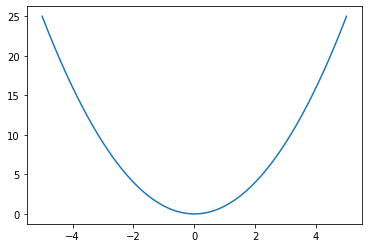

In [13]:
grid = np.linspace(-5,5,1000)
plt.plot(grid, grid**2);

### Inconveniences of GD
Gradient descent is sensitive to the choice of the learning rate $\alpha$. 

It is also painfully slow for large datasets. 

Proposed Solution: 
#### Stochastic Gradient Descent (SGD)

SGD is a version of GD that speeds up the computation by approximating the gradient using smaller batches (subsets) of the training data. This subset of data is called a "batch" or "minibatch".

Some definitions:
*iteration* is each time you update the weights.
*epoch* is the number of iterations it takes to look at $n$ examples. It is a "full pass through the dataset" or "having looked at all training examples once".

For GD that each iteration is an epoch. # of iterations = # of epochs.
With SGD, each iteration involves a subset of the data.
What fraction of the data, you might ask?
Well, batchsize/n.

E.g. if $n=1000$ and the batch size is $10$, then it's 1/100 or 1% of the whole training data each time.
Thus, we'd need to do $100$ iterations to get to an epoch.
In general, iterations per epoch = n/batchsize.
This given us a formula:
$$\frac{\text{number of iterations}}{\text{number of epochs}}=\frac{n}{\text{batch size}}$$

We don't use the same termination condition as gradient descent, for several reasons, including:
* Slow to check the full gradient
* Lower expectations about convergence when using big data sets

*Learning rate8
According to the theory, we need to decrease $\alpha$ over time, following certain guidelines.
Often people leave $\alpha$ constant and things tend to work out.

**Advantages of SGD**
* It is often much faster for big datasets.
* "Why spend all that time picking a direction for your step? An approximate direction seems fine"
* Generaliztaion of GD.
* If your training data does not fit into memory, SGD still works - you just need to fit a batch in memory.

Optional Readings:
[An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)

### Regularization

Usually	“true”	mapping	from	$x_i$ to	$y_i$ is	complex.
- Might need high-degree polynomial.
- Might	need to combine many features, and don’t know “relevant” ones.

But complex	models can overfit. So, what do we do?

**Regularization:**	Add	a penalty on the complexity of the model.

Regularization is an umbrella term that encompasses methods that help the learning algorithm build a less complex model. 
That often leads to higher bias but reduces the variance. (Bias-variance tradeoff)

The most used types of regularization are called L1 (Lasso) and L2 (Ridge) regularization. 
To create a regularized model, we modify the objective function by adding a penalizing term whose value is higher when the model is more complex.

In L2 Regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

 > $\sum_{i=1}^M(\mathbf{y_i} - \hat{\mathbf{y}})^2$ = $\sum_{i=1}^M(\mathbf{y_i} - \sum_{j=0}^p{\mathbf{w_j}} * {\mathbf{x_{ij}}})^2 + \lambda\sum_{j=0}^p{\mathbf{w_j}}^2$ 

This is equivalent to saying minimizing the cost function under the below condition:

 > $\sum_{i=1}^M(\mathbf{y_i} - \hat{\mathbf{y}})^2$ = $\sum_{i=1}^M(\mathbf{y_i} - \sum_{j=0}^p{\mathbf{w_j}} * {\mathbf{x_{ij}}})^2$
 
 for some $c > 0$ & $\sum_{j=0}^p{\mathbf{w_j}}^2 < c $
 


So L2 regression puts constraint on the coefficients ($w$). 
The penalty term ($\lambda$) regularizes the coefficients such that if the coefficients take large values, the optimization function is penalized. This way, L2 regression shrinks the coefficients, helping to reduce the model complexity and multi-collinearity. 

When $\lambda$ → 0 , the cost function becomes similar to the linear regression cost function. So, with a lower $\lambda$ on the features, the model will be close to a linear regression model.

L2 also has the advantage of being differentiable, so gradient descent can be used for optimizing the objective function.

L1 regularization produces a sparse model, a model that has most of its parameters equal to zero.

So L1 performs feature selection by deciding which features are essential for prediction and which are not. That can be useful in case you want to increase model explainability. 

The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as:

 > $\sum_{i=1}^M(\mathbf{y_i} - \hat{\mathbf{y}})^2$ = $\sum_{i=1}^M(\mathbf{y_i} - \sum_{j=0}^p{\mathbf{w_j}} * {\mathbf{x_{ij}}})^2 + \lambda\sum_{j=0}^p\mid{\mathbf{w_j}}\mid$ 

for some $c > 0$ & $\sum_{j=0}^p{\mathbf{w_j}}^2 < c $

Same as L2 regression cost function, when $\lambda = 0$, the equation above looks like a linear regression. In L2, we took the square of coefficients, here, absolute values or magnitudes are taken into account. 

L1 regression can lead to zero coefficients, some of the features are not considerd. 

Just like Ridge regression the regularization parameter ($\lambda$) can be controlled.

If your  goal is to maximize the performance of the model on the holdout data, then L2 usually gives better results. 

L1 and L2 regularization methods were also combined in what is called elastic net regularization with L1 and L2 regularizations being special cases. You can find in the literature the name Ridge regularization for L2 and Lasso for L1.
